<a href="https://colab.research.google.com/github/youngwoo28/2024-1-my-BDA/blob/main/inclass/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. koreanize_matplotlib 설치 및 설정

In [43]:
# koreanize_matplotlib 설치
!pip install koreanize-matplotlib


##2. 한글 폰트 설정

In [46]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 타이타닉 데이터 로드
titanic = sns.load_dataset('titanic')


##3. 기본 정보 확인

In [47]:
# 데이터셋의 기본 정보 확인
print(titanic.info())
print(titanic.describe())
print(titanic.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
         survived      pclass         age       sibsp       parch        f

##4. 결측치 확인 및 처리

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


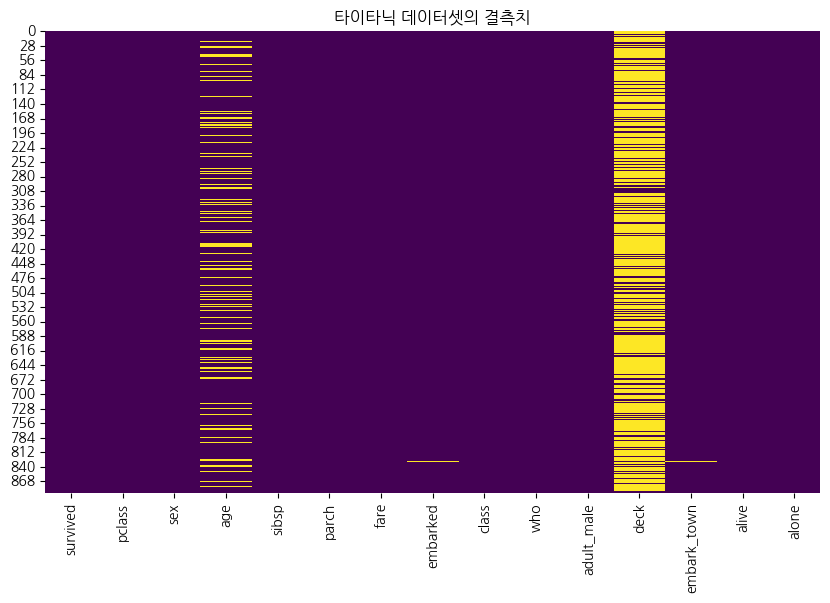

In [48]:
# 결측치 확인
print(titanic.isnull().sum())

# 결측치 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('타이타닉 데이터셋의 결측치')
plt.show()

# 결측치 처리: 간단히 나이의 결측치는 중앙값으로, 나머지는 제거
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic.drop(columns=['deck', 'embark_town'], inplace=True)
titanic.dropna(inplace=True)


##5. 데이터 시각화

###생존 여부에 따른 분포

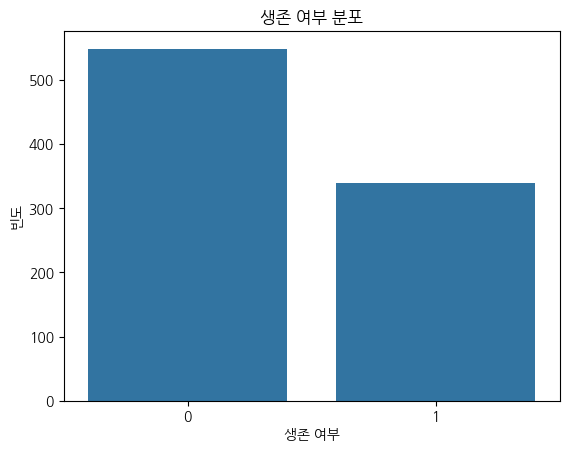

In [49]:
sns.countplot(data=titanic, x='survived')
plt.title('생존 여부 분포')
plt.xlabel('생존 여부')
plt.ylabel('빈도')
plt.show()


###성별에 따른 생존 여부

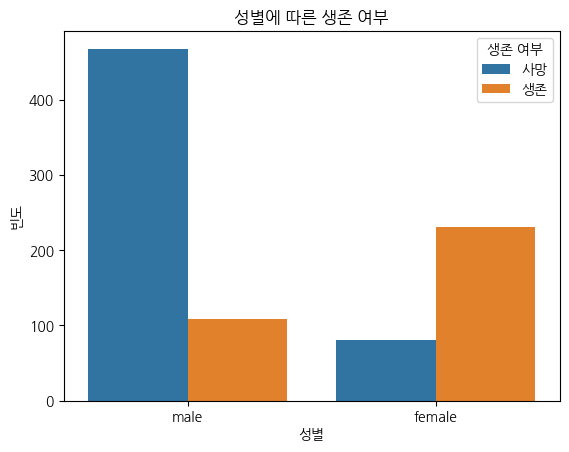

In [50]:
sns.countplot(data=titanic, x='sex', hue='survived')
plt.title('성별에 따른 생존 여부')
plt.xlabel('성별')
plt.ylabel('빈도')
plt.legend(title='생존 여부', labels=['사망', '생존'])
plt.show()


###나이 분포

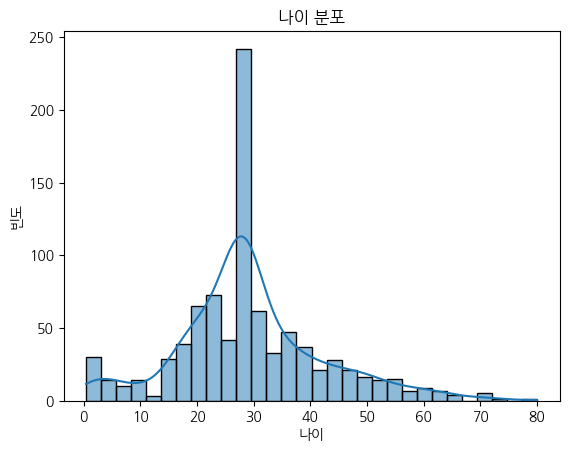

In [51]:
sns.histplot(titanic['age'], bins=30, kde=True)
plt.title('나이 분포')
plt.xlabel('나이')
plt.ylabel('빈도')
plt.show()


###나이와 생존 여부의 관계

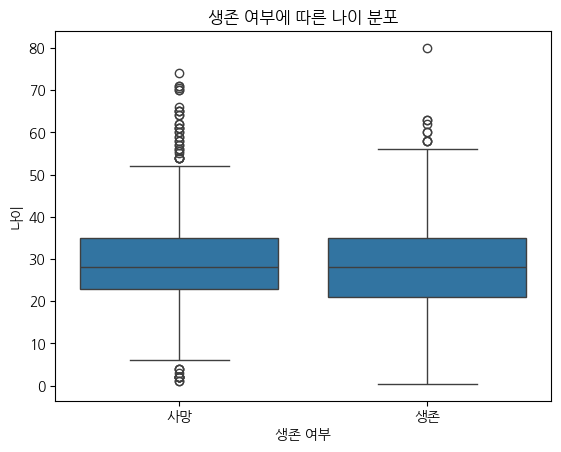

In [57]:
sns.boxplot(data=titanic, x='survived', y='age')
plt.title('생존 여부에 따른 나이 분포')
plt.xlabel('생존 여부')
plt.ylabel('나이')
plt.xticks([0, 1], ['사망', '생존'])
plt.show()


###Pclass(티켓 클래스)와 생존 여부

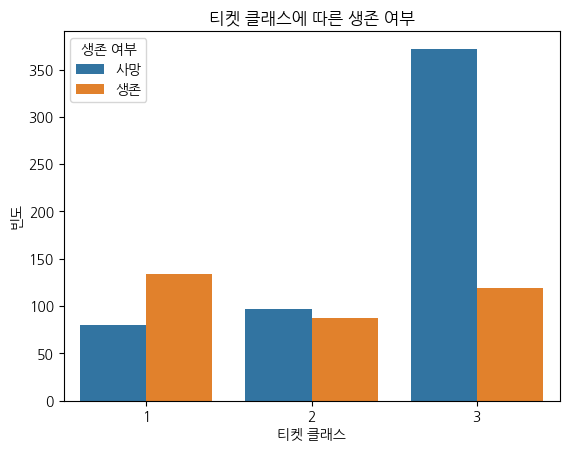

In [52]:
sns.countplot(data=titanic, x='pclass', hue='survived')
plt.title('티켓 클래스에 따른 생존 여부')
plt.xlabel('티켓 클래스')
plt.ylabel('빈도')
plt.legend(title='생존 여부', labels=['사망', '생존'])
plt.show()


###성별과 Pclass에 따른 생존 여부

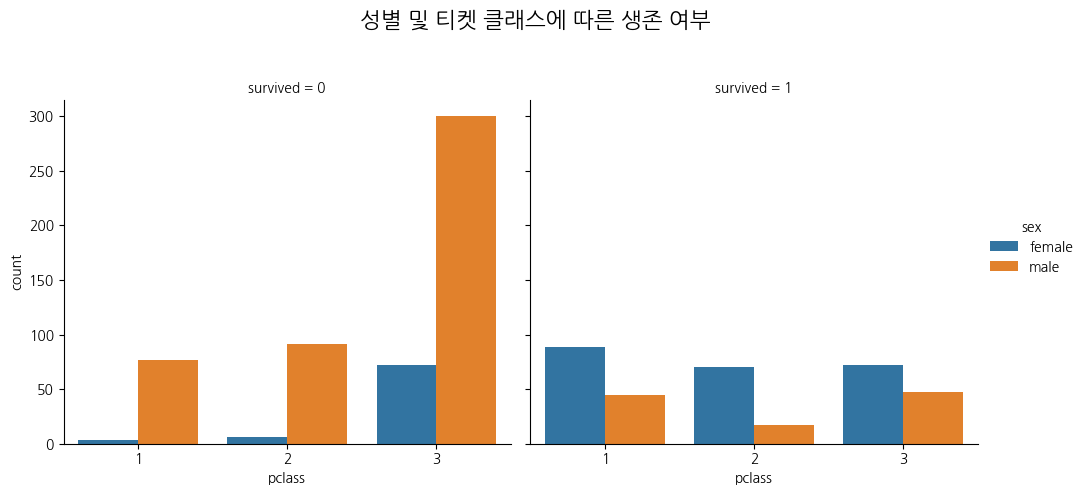

In [53]:
sns.catplot(data=titanic, x='pclass', hue='sex', col='survived', kind='count')
plt.subplots_adjust(top=0.8)
plt.suptitle('성별 및 티켓 클래스에 따른 생존 여부', size=16)
plt.show()


##6.결론 도출
- 남성보다 여성이 생존 확률이 더 높았습니다.
- 1등석 승객의 생존 확률이 더 높았습니다.
- 나이가 어릴수록 생존 확률이 높았습니다.
